In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re


In [3]:
url = "https://worldpopulationreview.com/countries/countries-by-gdp#worldCountries"
html = urlopen(url)

In [4]:
soup = BeautifulSoup(html)

In [5]:
# Website Title
title = soup.title
# print(title) #or
print(title.text)

GDP Ranked by Country 2021


In [6]:
# Finds anchor(<a>) tags from Website
links = soup.find_all('a', href = True)
count_link = len(links)
print(f"There are {count_link} anchor(<a>) tags in this Page. ")

# Extracts the links related with <href> from the Website
for link in links:
    print(link['href'])

There are 469 anchor(<a>) tags in this Page. 
/
/continents
/countries
/world-cities
/states
/us-counties
/us-cities
/zips
/canadian-provinces
/continents/world-population
/countries/united-states-population
/countries/france-population
/countries/japan-population
https://www.imf.org/external/index.htm
/countries/china-population
/countries/germany-population
/countries/united-kingdom-population
/countries/india-population
/countries/italy-population
/countries/brazil-population
/countries/canada-population
/continents/europe-population
https://www.imf.org/external/index.htm
/world-cities/london-population
https://www.worldbank.org/
/regions/european-union-population
/country-rankings/exports-by-country
/country-rankings/most-visited-countries
/continents/latin-america-population
https://www.transparency.org/cpi2018
/country-rankings/least-corrupt-countries
https://www.heritage.org/index/
http://www.imf.org/external/pubs/ft/weo/2018/01/weodata/download.aspx
https://datacatalog.worldban

In [7]:
data = []

allrows = soup.find_all("tr")
# print(allrows[1:10])

for row in allrows:
    row_list=row.find_all("td")
    dataRow = []
    
# print(row_list)

    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
# print(data[101],data[2],data[5])
print(data[1:4])


[['1', 'United States', '22.20 Tn', '18.62 Tn', '$66,678', '332,915,073'], ['2', 'China', '15.47 Tn', '11.22 Tn', '$10,710', '1,444,216,107'], ['3', 'Japan', '5.50 Tn', '4.94 Tn', '$43,597', '126,050,804']]


In [8]:
pandas_table = pd.DataFrame(data[1:5], columns=["Rank", "Name", "GDP(IMF 19)", "GDP(UN 16)", "GDP Per Capita", "Population"])
pandas_table.head(3)

,Rank,Name,GDP(IMF 19),GDP(UN 16),GDP Per Capita,Population
0,1,United States,22.20 Tn,18.62 Tn,"$66,678","332,915,073"
1,2,China,15.47 Tn,11.22 Tn,"$10,710","1,444,216,107"
2,3,Japan,5.50 Tn,4.94 Tn,"$43,597","126,050,804"


In [9]:
graph = pandas_table.sort_values(by = "Population", ascending=False)
print(graph)

  Rank           Name GDP(IMF 19) GDP(UN 16) GDP Per Capita     Population
3    4        Germany     4.16 Tn    3.48 Tn        $49,548     83,900,473
0    1  United States    22.20 Tn   18.62 Tn        $66,678    332,915,073
2    3          Japan     5.50 Tn    4.94 Tn        $43,597    126,050,804
1    2          China    15.47 Tn   11.22 Tn        $10,710  1,444,216,107


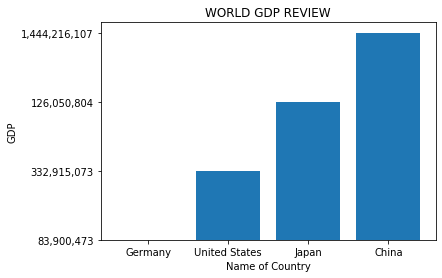

In [10]:
plt.bar(graph['Name'], graph['Population'])
plt.xlabel('Name of Country')
plt.ylabel('GDP')
plt.title('WORLD GDP REVIEW')
plt.show()